### **Insurance Cost Prediction**









    



Many factors have been shown association with higher insurance price such as age, smoking status, pre-existing disease etc,. Researchers are still exploring more features to help insurance company to predict insurance price with a much higher accuracy.

What should be the actual health insurance price for an individual or a family is an issue for many companies.?!

### **Major Aim Of This Project**

Aim of the current project is in depth exploration to identify important features relevant to health insurance price as well as best ML model to help company increase the accuracy of health insurance prediction.

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
df1 = pd.read_csv("Health_insurance_cost.csv") #Loading the Dataset


In [36]:
#copying the dataset as to not disturb the original one
df = df1.copy()

In [37]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [38]:
df.shape

(1338, 7)

In [39]:
#column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [40]:
#statistics of the dataset
df.describe(include='all')


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


<Axes: >

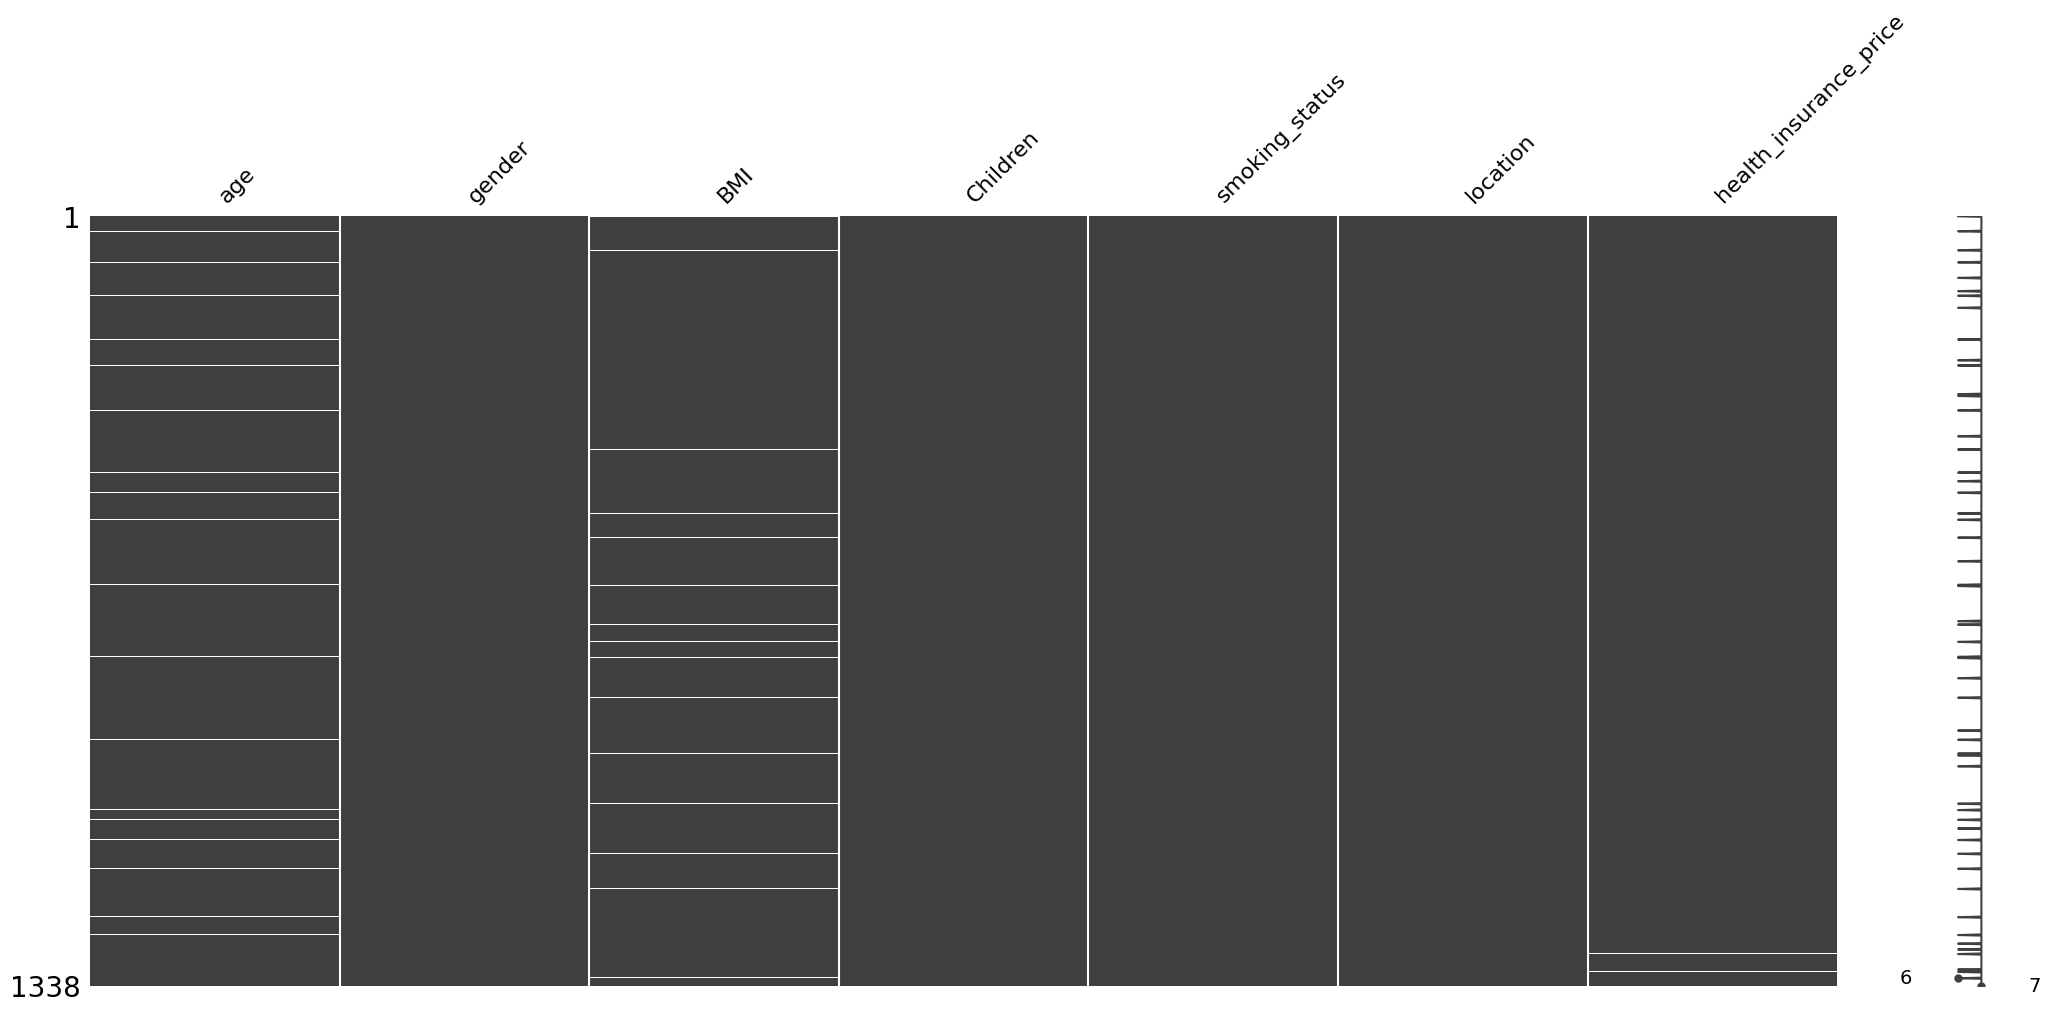

In [41]:
import missingno as msno
# creating matrix plot to see the pattern in missing values
msno.matrix(df)

<Axes: >

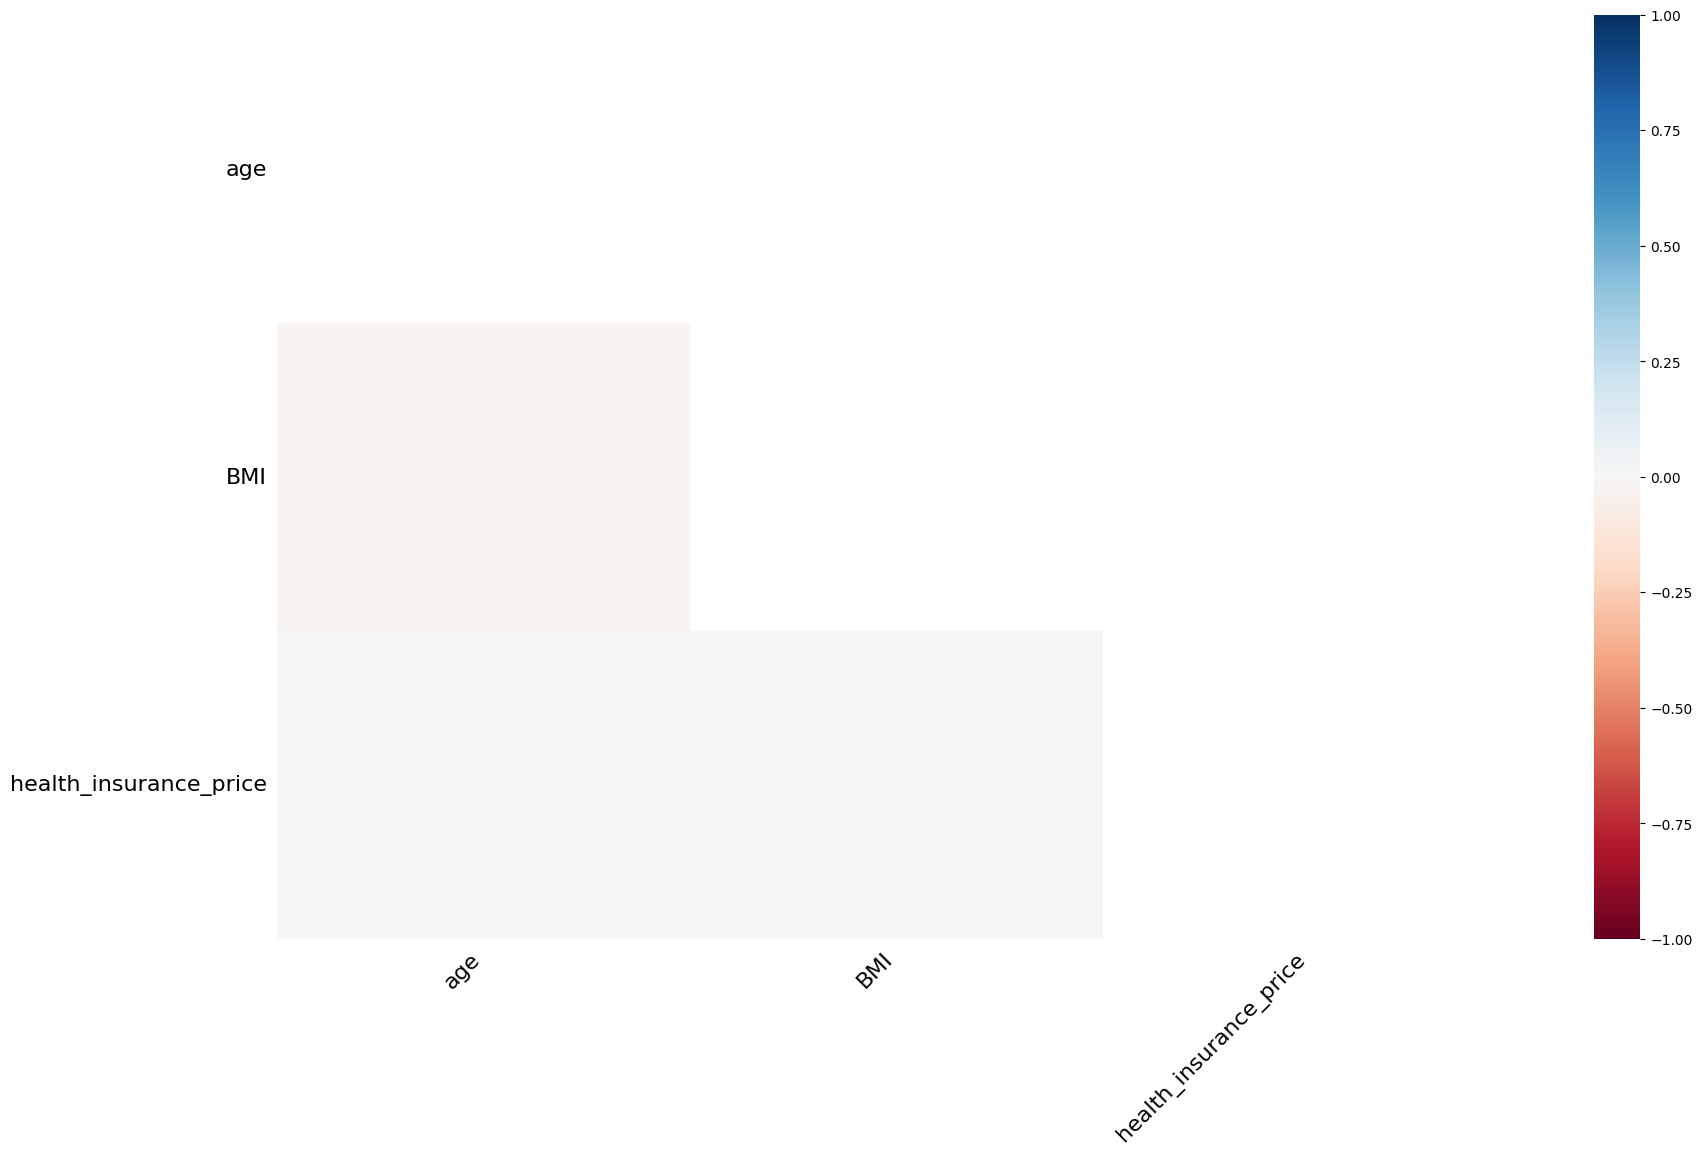

In [42]:
msno.heatmap(df) # to check if there is any corelation between misisng values

There is no Correlation between Missing values

In [43]:
#check Percentage of Null values
df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

### **Dealing with missing values**

Axes(0.125,0.11;0.775x0.77)


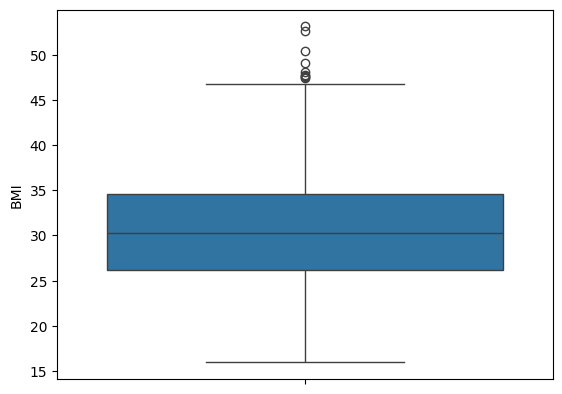

In [44]:
#checking for outliers
print(sns.boxplot(data=df,y='BMI'))


Axes(0.125,0.11;0.775x0.77)


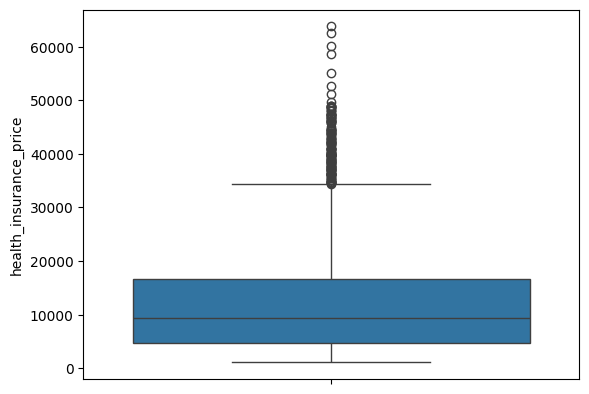

In [45]:
print(sns.boxplot(data=df,y='health_insurance_price'))

Axes(0.125,0.11;0.775x0.77)


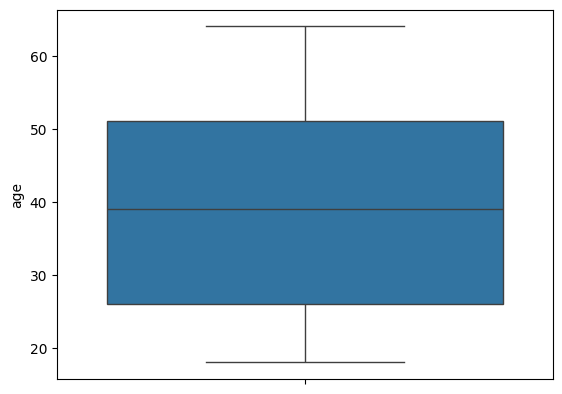

In [46]:
print(sns.boxplot(data=df,y='age'))

In [47]:
#if outliers then Use Median otherwise use Mean
df['age'] = df['age'].fillna(df.age.mean())
df['health_insurance_price'] =df['health_insurance_price'].fillna(df.health_insurance_price.median())
df['BMI'] = df['BMI'].fillna(df.BMI.median())

In [48]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


### **Visualization**

Univariate Analysis:

Aim is to check the distribution of the data. If it is normally distributed or skewed for numerical value. If it is a categorical value then we have to check if categories are balanced on unblanced.

<Axes: xlabel='age', ylabel='Count'>

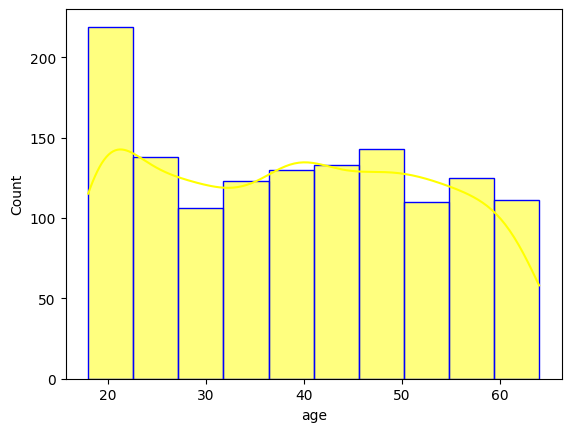

In [49]:
#AGE
sns.histplot(data = df,x="age",bins=10,color="yellow",edgecolor='blue', kde = True)

Most customers Range from 18-30

<ipython-input-50-1894699342c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.Children,palette ="Set2")


<Axes: xlabel='Children', ylabel='count'>

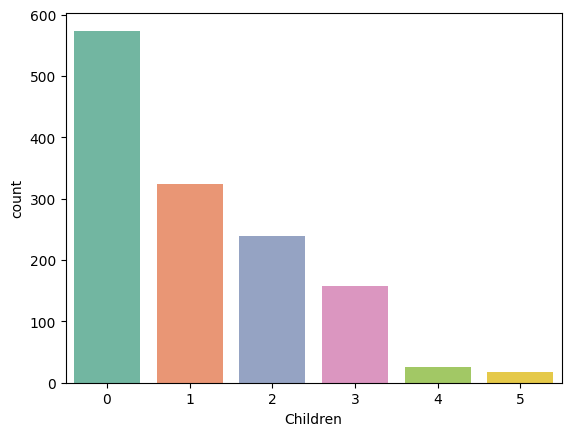

In [50]:
sns.countplot(x=df.Children,palette ="Set2")

Majority of customers Don't have children.
But almost 300 of them have 1 child.

<ipython-input-51-7023375cc5db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.smoking_status,palette ="Set1")


<Axes: xlabel='smoking_status', ylabel='count'>

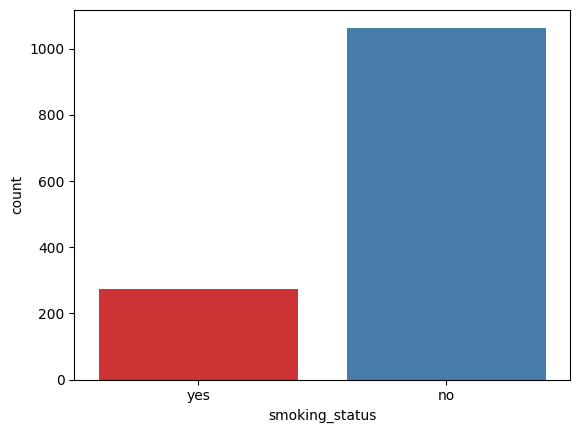

In [51]:
sns.countplot(x=df.smoking_status,palette ="Set1")

Vast majority of them are no smokers.
A good sign :)

<Axes: xlabel='BMI', ylabel='Count'>

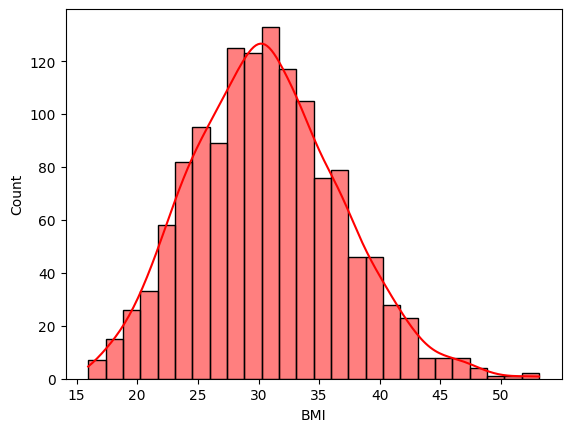

In [52]:
sns.histplot(data = df['BMI'],color='red', kde = True)

Looks like BMI have a Normal Distribution.

### **BIVARIATE ANALYSIS**

<Axes: xlabel='age', ylabel='health_insurance_price'>

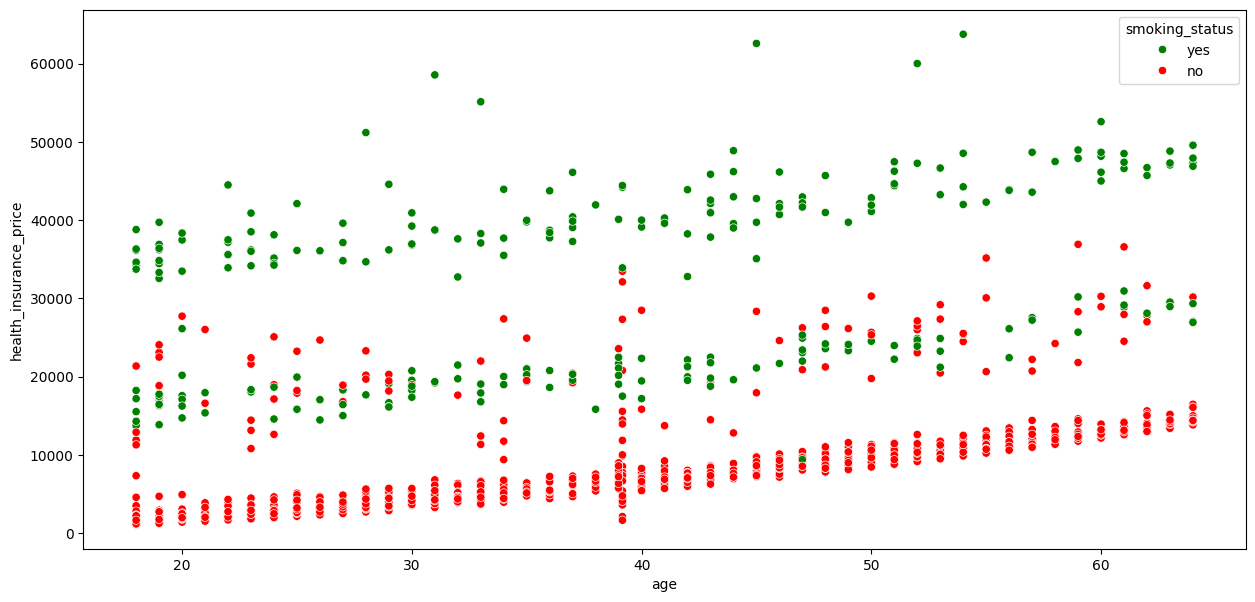

In [53]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

Smoker's insurance price is higher compared to non smoker.
Also increasing in age increases price for Non smoker too.

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

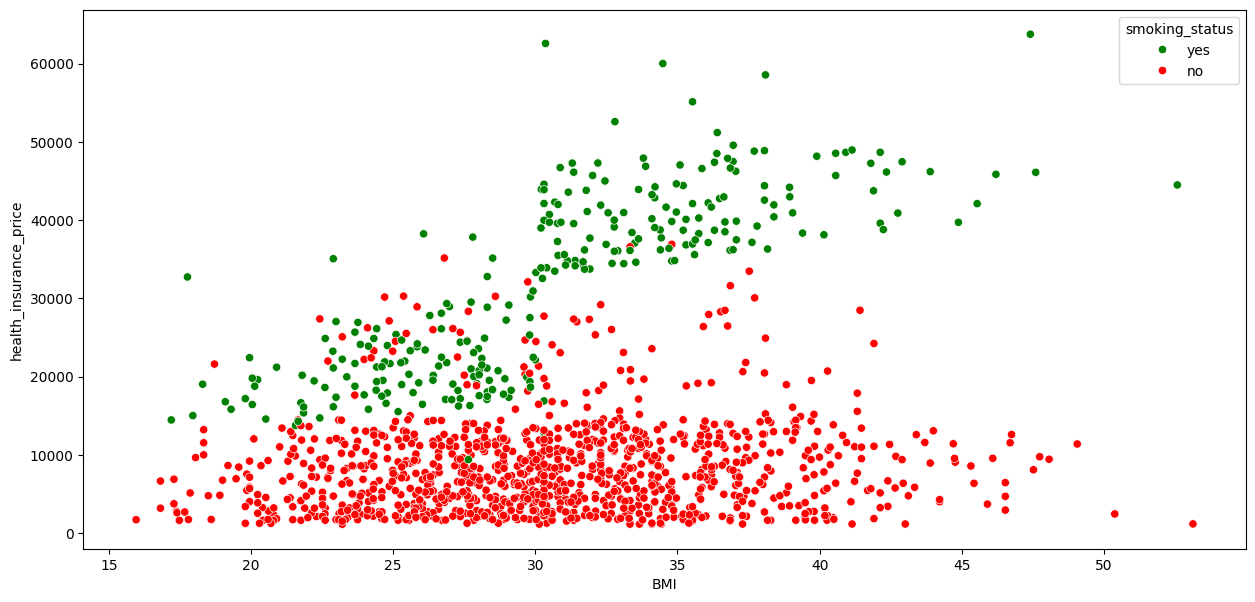

In [54]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['BMI'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

Higher bmi with smoking , high insurance price.

<ipython-input-55-dfc510a69ca8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['dodgerblue','green'])


<Axes: xlabel='gender', ylabel='health_insurance_price'>

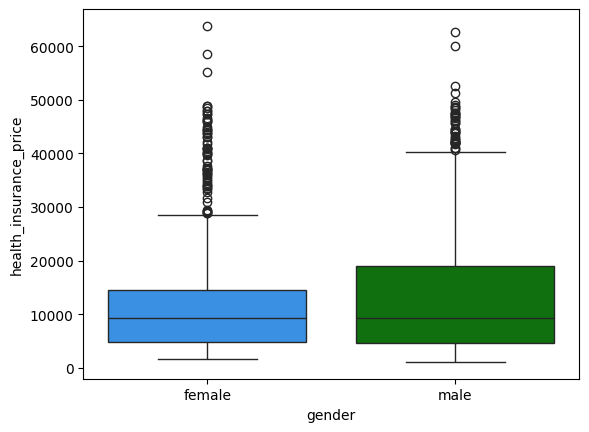

In [55]:
sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['dodgerblue','green'])

<ipython-input-56-882658abb80c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-56-882658abb80c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

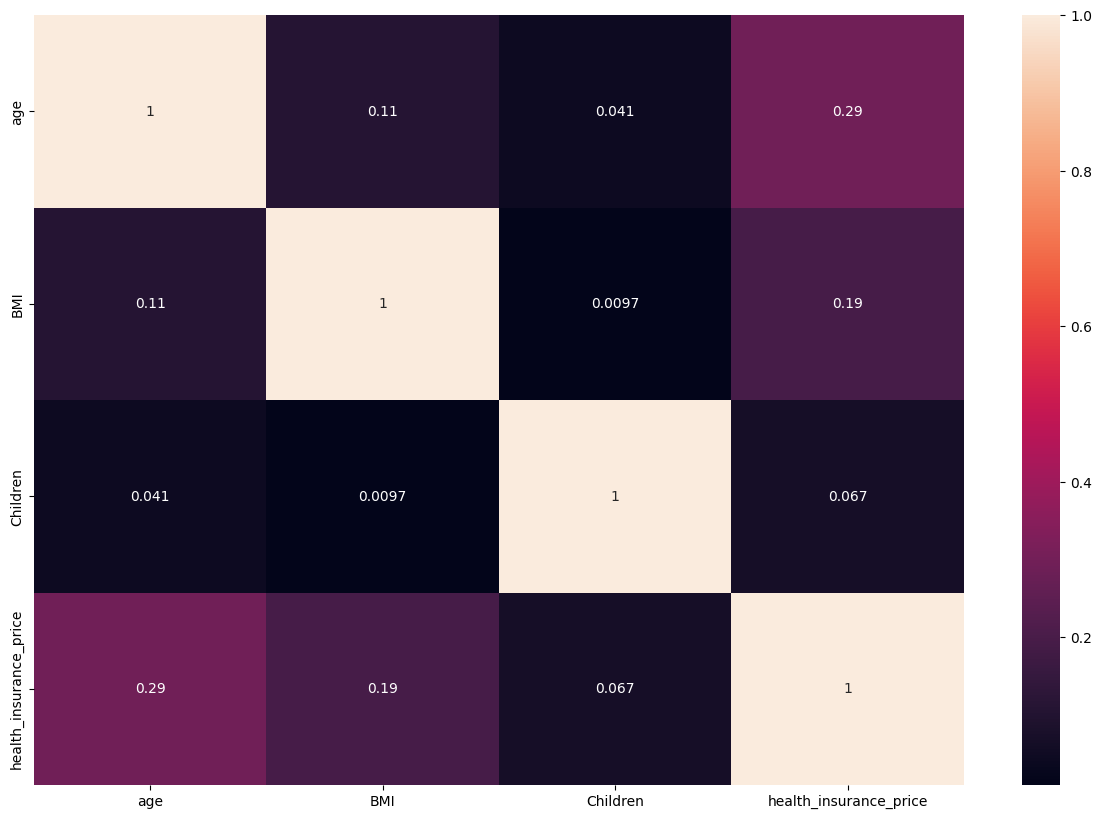

In [56]:
df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

### Treating Outliers

In [57]:
# Here I am using IQR to remove outliers - BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df['BMI']=df['BMI'].clip(upper_bound,lower_bound)


# Here I am using IQR to remove outliers - hOUSING
Q11 = df['health_insurance_price'].quantile(0.25)
Q33 = df['health_insurance_price'].quantile(0.75)

IQR1 = Q33 - Q11

upper_bound1 = Q33 + 1.5 * IQR1
lower_bound1 = Q11 - 1.5 * IQR1
df['health_insurance_price']=df['health_insurance_price'].clip(upper_bound1,lower_bound1)

8.114999999999998


Axes(0.125,0.11;0.775x0.77)


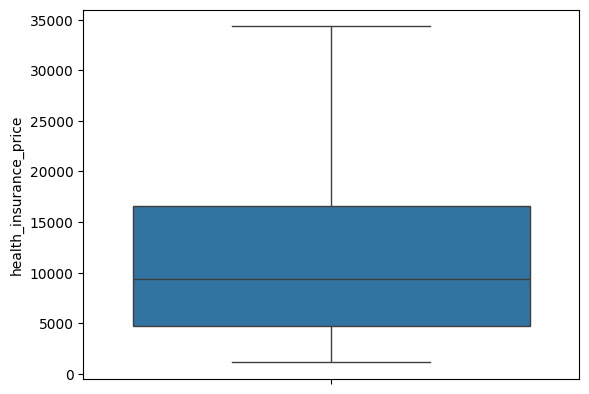

In [58]:
print(sns.boxplot(data=df,y='health_insurance_price'))

### **Encoding Categorical Columns**

In [59]:
# encoding sex column
df.replace({'gender':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'smoking_status':{'yes':0,'no':1}}, inplace=True)

df.replace({'location':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [61]:
#copy the data for standardization and normalization
dfs = df.copy()
dfn =df.copy()

In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sscaled =ss.fit_transform(dfs)
df_standard = pd.DataFrame(sscaled,columns=dfs.columns)
df_standard.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,-1.450589,1.010519,-0.051547,-0.908614,-1.970587,-0.403289,0.437913
1,-1.522520,-0.989591,0.525881,-0.078767,0.507463,-1.287881,-1.061008
2,-0.803210,-0.989591,0.397564,1.580926,0.507463,-1.287881,-0.791675
3,-0.443556,-0.989591,-1.318054,-0.908614,0.507463,1.365894,0.942143
4,-0.515487,-0.989591,-0.289017,-0.908614,0.507463,1.365894,-0.849281


In [64]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
nscaled =norm.fit_transform(dfs)
df_normal = pd.DataFrame(nscaled,columns=dfn.columns)
df_normal.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,0.021739,1.0,0.468141,0.0,0.0,0.333333,0.474517
1,0.000000,0.0,0.581219,0.2,1.0,0.000000,0.018173
2,0.217391,0.0,0.556090,0.6,1.0,0.000000,0.100171
3,0.326087,0.0,0.220119,0.0,1.0,1.000000,0.628029
4,0.304348,0.0,0.421637,0.0,1.0,1.000000,0.082633


### Splitting the data

In [65]:
X1=df_standard.drop(['health_insurance_price'], axis=1)
y1 = df_standard['health_insurance_price']

In [66]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

Linear Regressoin-Train
----------------------------------
Mean Absolute Error (MAE): 0.3409540872668296
Mean Squared Error (MSE): 0.2685753949929439
R-squared (R²): 0.7277511618160253
Root Mean Squared Error (RMSE): 0.5182426024488376


Linear Regression-Test
----------------------------------
Mean Absolute Error (MAE): 0.3319231180974253
Mean Squared Error (MSE): 0.23406698866895836
R-squared (R²): 0.777627387489779
Root Mean Squared Error (RMSE): 0.4838047009578952


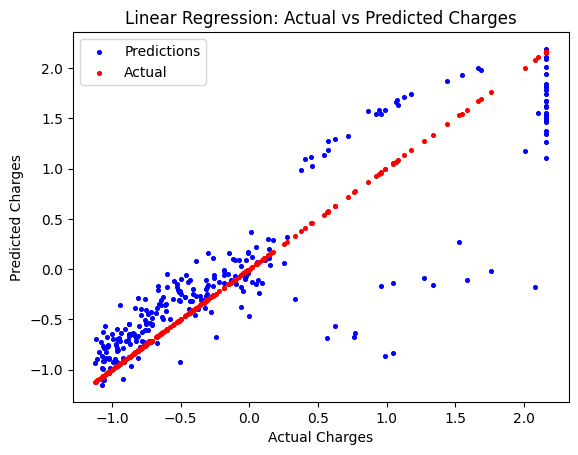

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linear = LinearRegression()
linear.fit(X_train1,y_train1)
y_pred_train1 = linear.predict(X_train1)
y_pred_test1 = linear.predict(X_test1)

# Performance of Train set

# Calculate evaluation metrics
mae1 = mean_absolute_error(y_train1,y_pred_train1)
mse1 = mean_squared_error(y_train1,y_pred_train1)
r_squared1 = r2_score(y_train1,y_pred_train1)
rmse1 = np.sqrt(mse1)
print("Linear Regressoin-Train")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae1)
print("Mean Squared Error (MSE):", mse1)
print("R-squared (R²):", r_squared1)
print("Root Mean Squared Error (RMSE):", rmse1)
print('='*30)
print('\n')

# Performance of Test set

# Calculate evaluation metrics
mae11 = mean_absolute_error(y_test1,y_pred_test1)
mse11 = mean_squared_error(y_test1,y_pred_test1)
r_squared11 = r2_score(y_test1,y_pred_test1)
rmse11 = np.sqrt(mse11)
print("Linear Regression-Test")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae11)
print("Mean Squared Error (MSE):", mse11)
print("R-squared (R²):", r_squared11)
print("Root Mean Squared Error (RMSE):", rmse11)


# Scatter plot of actual vs predicted values
plt.scatter(y_test1, y_pred_test1, color='blue', label='Predictions', s=7)
plt.scatter(y_test1, y_test1, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()


In [70]:
X=df_normal.drop(['health_insurance_price'], axis=1)
y = df_normal['health_insurance_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random forest Regressor-Train
----------------------------------
Mean Absolute Error (MAE): 0.03051599666519872
Mean Squared Error (MSE): 0.003190914651178626
R-squared (R²): 0.9651031067860456
Root Mean Squared Error (RMSE): 0.05648818151771772


Random forest Regressor-Test
----------------------------------
Mean Absolute Error (MAE): 0.06860046486133037
Mean Squared Error (MSE): 0.017702168237514547
R-squared (R²): 0.8185573589446576
Root Mean Squared Error (RMSE): 0.13304949544254027


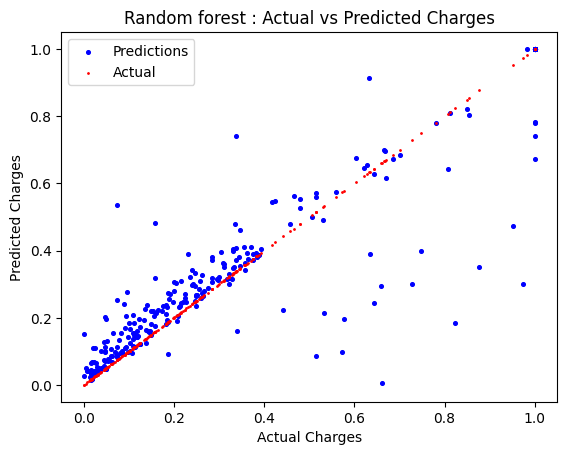

In [71]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train,y_train)
y_pred_train2 = random.predict(X_train)
y_pred_test2 = random.predict(X_test)


# Performance of Train set

# Calculate evaluation metrics
mae2 = mean_absolute_error(y_train,y_pred_train2)
mse2 = mean_squared_error(y_train,y_pred_train2)
r_squared2 = r2_score(y_train,y_pred_train2)
rmse2 = np.sqrt(mse2)

print("Random forest Regressor-Train")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("R-squared (R²):", r_squared2)
print("Root Mean Squared Error (RMSE):", rmse2)


# Performance of Test set

# Calculate evaluation metrics
mae12 = mean_absolute_error(y_test,y_pred_test2)
mse12 = mean_squared_error(y_test,y_pred_test2)
r_squared12 = r2_score(y_test,y_pred_test2)
rmse12 = np.sqrt(mse12)
print('='*30)
print('\n')
print("Random forest Regressor-Test")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae12)
print("Mean Squared Error (MSE):", mse12)
print("R-squared (R²):", r_squared12)
print("Root Mean Squared Error (RMSE):", rmse12)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test2, color='blue', label='Predictions', s=7)
plt.scatter(y_test,y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random forest : Actual vs Predicted Charges')
plt.legend()
plt.show()


XGBoost-Train
----------------------------------
Mean Absolute Error (MAE): 0.014094466731633658
Mean Squared Error (MSE): 0.0007477497971336668
R-squared (R²): 0.9918223620266085
Root Mean Squared Error (RMSE): 0.027345014118366567


Xgboost-Test
----------------------------------
Mean Absolute Error (MAE): 0.07689265844507137
Mean Squared Error (MSE): 0.02024559930822987
R-squared (R²): 0.7924878490054843
Root Mean Squared Error (RMSE): 0.14228703141266905


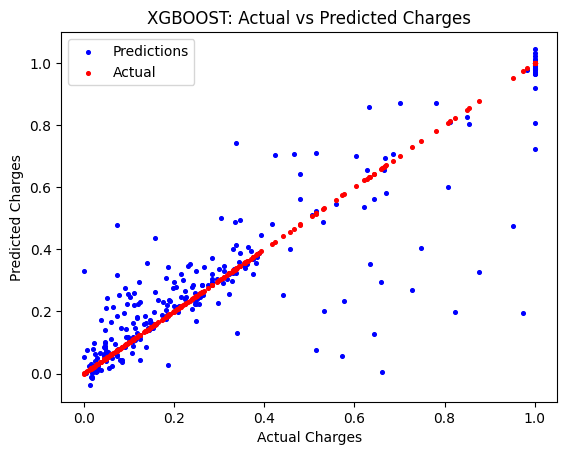

In [72]:
#xgboost
import xgboost as xgb
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train,y_train)
y_pred_train3 = xgbr.predict(X_train)
y_pred_test3 = xgbr.predict(X_test)


# Performance of Train set

# Calculate evaluation metrics
mae3 = mean_absolute_error(y_train,y_pred_train3)
mse3 = mean_squared_error(y_train,y_pred_train3)
r_squared3 = r2_score(y_train,y_pred_train3)
rmse3 = np.sqrt(mse3)
print("XGBoost-Train")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae3)
print("Mean Squared Error (MSE):", mse3)
print("R-squared (R²):", r_squared3)
print("Root Mean Squared Error (RMSE):", rmse3)
print('='*30)
print('\n')

# Performance of Test set

# Calculate evaluation metrics
mae4 = mean_absolute_error(y_test,y_pred_test3)
mse4 = mean_squared_error(y_test,y_pred_test3)
r_squared4 = r2_score(y_test,y_pred_test3)
rmse4 = np.sqrt(mse4)
print("Xgboost-Test")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae4)
print("Mean Squared Error (MSE):", mse4)
print("R-squared (R²):", r_squared4)
print("Root Mean Squared Error (RMSE):", rmse4)


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test3, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('XGBOOST: Actual vs Predicted Charges')
plt.legend()
plt.show()

Decision tree-Train
----------------------------------
Mean Absolute Error (MAE): 0.0008902252024922332
Mean Squared Error (MSE): 0.0002213294669229515
R-squared (R²): 0.9975794680783897
Root Mean Squared Error (RMSE): 0.014877145792219404


Decision tree-Test
----------------------------------
Mean Absolute Error (MAE): 0.07542304750275042
Mean Squared Error (MSE): 0.030521214050725234
R-squared (R²): 0.687165458418638
Root Mean Squared Error (RMSE): 0.17470321705888886


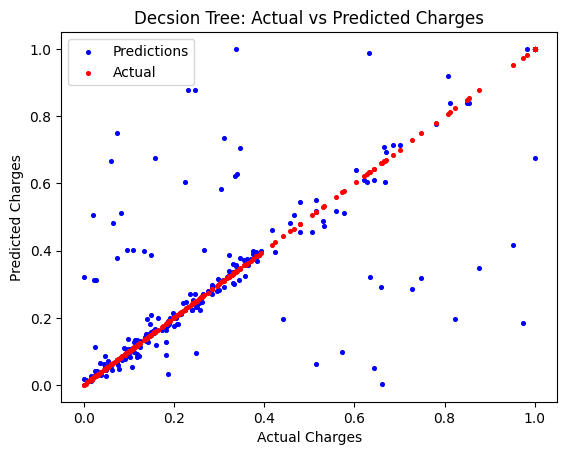

In [74]:
#Decision tress
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_train4 = dt.predict(X_train)
y_pred_test4 = dt.predict(X_test)


# Performance of Train set

# Calculate evaluation metrics
mae4 = mean_absolute_error(y_train,y_pred_train4)
mse4 = mean_squared_error(y_train,y_pred_train4)
r_squared4 = r2_score(y_train,y_pred_train4)
rmse4 = np.sqrt(mse4)
print("Decision tree-Train")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae4)
print("Mean Squared Error (MSE):", mse4)
print("R-squared (R²):", r_squared4)
print("Root Mean Squared Error (RMSE):", rmse4)
print('='*30)
print('\n')

# Performance of Test set

# Calculate evaluation metrics
mae5 = mean_absolute_error(y_test,y_pred_test4)
mse5 = mean_squared_error(y_test,y_pred_test4)
r_squared5 = r2_score(y_test,y_pred_test4)
rmse5 = np.sqrt(mse5)
print("Decision tree-Test")
print('----------------------------------')
print("Mean Absolute Error (MAE):", mae5)
print("Mean Squared Error (MSE):", mse5)
print("R-squared (R²):", r_squared5)
print("Root Mean Squared Error (RMSE):", rmse5)


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test4, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Decsion Tree: Actual vs Predicted Charges')
plt.legend()
plt.show()
